In [80]:
pip install Recurrsive-Feature-Selector

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Import Packages
import pandas as pd
import xgboost as xgb
import RecurrsiveFeatureSelector

In [13]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Drop unnecessary column
iris.drop('Id', axis=1, inplace=True)
# Label the target
iris.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)

In [15]:
# Splitting dataset into dataframes
from sklearn.model_selection import train_test_split

X = iris.drop('Species', axis=1)
y = iris[['Species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# Standardizing the dataframes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [17]:
# instantiate the ML model
cls = xgb.XGBClassifier(verbosity=0, use_label_encoder=False )

# fit the training datasets into the model
cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [18]:
from sklearn.metrics import classification_report
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



1 / 4   SepalLengthCm : 
         Score =  0.62 ,   Standard Deviation =  0.121
 
2 / 4   SepalWidthCm : 
         Score =  0.48 ,   Standard Deviation =  0.103
 
3 / 4   PetalLengthCm : 
         Score =  0.9099999999999999 ,   Standard Deviation =  0.049
 
4 / 4   PetalWidthCm : 
         Score =  0.93 ,   Standard Deviation =  0.068
 
 
Best feature to start with: PetalWidthCm
(According to scoring)
 
RFS of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exac

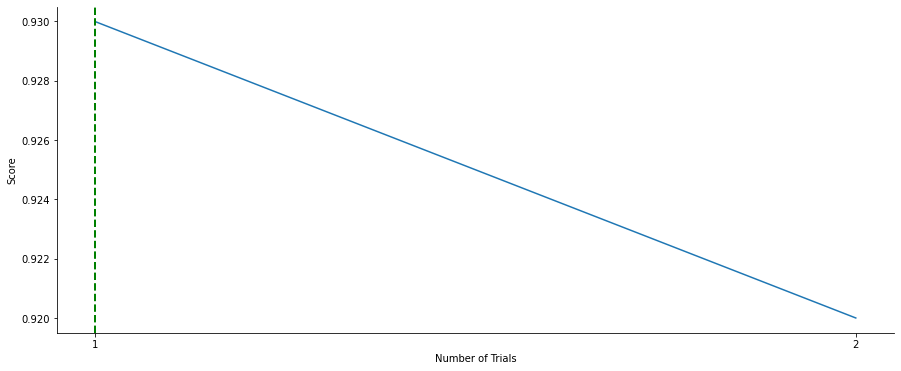

In [34]:
rfs# Instantiate the RecurrsiveFeatureSelector class
rfs = RecurrsiveFeatureSelector.Recurrsive_Feature_Selector()
rfs.search(model=cls, 
           X=X_train, 
           y=y_train, 
           cv=5, 
           task='classification', 
           scoring='accuracy', 
           k=None, 
           n=2, 
           jump_start=False, 
           base_com=None)

In [35]:
# fit the training datasets with only the best features into the model
cls.fit(X_train[rfs.best_combination], y_train)
y_pred = cls.predict(X_test[rfs.best_combination])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

